# 얕은 신경망을 이용한 다중 분류 문제

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 함수 구현

### Sigmoid 함수
$sigmoid(x) = \dfrac{1}{1+e^{-x}}$

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Softmax 함수
$softmax(x)_i = \dfrac{e^{x_i}}{\sum{e^{x_j}}}$

In [3]:
def softmax(x):
    e_x = np.exp(x)
    return e_x / np.sum(e_x)

## 네트워크 구조 정의

In [4]:
# Define network architecture
class ShallowNN:
    def __init__(self, num_input, num_hidden, num_output):
        self.W_h = np.zeros((num_hidden, num_input), dtype=np.float32)
        self.b_h = np.zeros((num_hidden, 1), dtype=np.float32)
        self.W_o = np.zeros((num_output, num_hidden), dtype=np.float32)
        self.b_o = np.zeros((num_output, 1), dtype=np.float32)
    
    def __call__(self, x):
        h = sigmoid(np.matmul(self.W_h, x) + self.b_h)
        return softmax(np.matmul(self.W_o, h) + self.b_o)

## 데이터셋 가져오기, 정리하기

In [5]:
# Import and organize dataset
dataset = np.load('./dataset/ch2_dataset.npz')
inputs = dataset['inputs']
labels = dataset['labels']

## 모델 만들기

In [6]:
# Create Model
model = ShallowNN(2, 128, 10)

## 사전에 학습된 파라미터 불러오기

In [7]:
weights = np.load('./dataset/ch2_parameters.npz')
model.W_h = weights['W_h']
model.b_h = weights['b_h']
model.W_o = weights['W_o']
model.b_o = weights['b_o']

## 모델 구동 및 결과 프린트

In [10]:
outputs = []

for pt, label in zip(inputs, labels):
    output = model(pt)
    outputs.append(np.argmax(output))
    print(np.argmax(output), label)
    
outputs = np.stack(outputs, axis=0)

0 0
0 0
2 0
0 0
1 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
2 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
2 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
6 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
3 0
0 0
0 0
0 0
0 0
0 0
0 0
6 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
2 0
6 0
0 0
0 0
0 0
0 0
3 0
0 0
0 0
2 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
9 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
5 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
5 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
2 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
3 2
2 2
2 2
2 2
2 2
0 2
1 2
0 2
0 2
2 2
2 2
0 2
2 2
2 2
0 2
0 2
2 2
2 2
2 2
2 2
2 2
2 2
2 2
0 2
2 2
2 2


## 정답 클래스 스캐터 플랏

Text(0.5, 1.0, 'true_label')

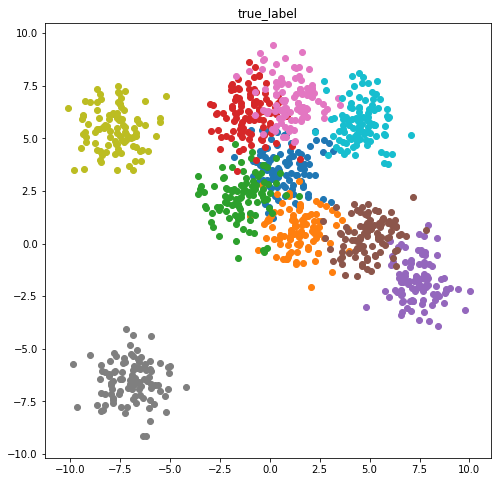

In [16]:
plt.figure(figsize=(8, 8))

for idx in range(10):
    mask = labels == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('true_label')

## 모델 출력 클래스 스캐터 플랏

Text(0.5, 1.0, 'model_output')

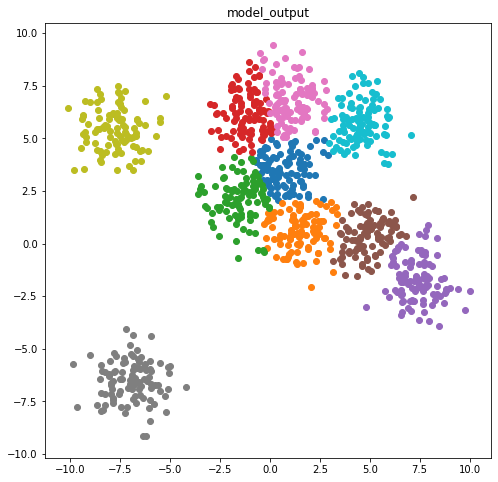

In [17]:
plt.figure(figsize=(8, 8))

for idx in range(10):
    mask = outputs == idx
    plt.scatter(inputs[mask, 0], inputs[mask, 1])
plt.title('model_output')